<a href="https://colab.research.google.com/github/ucchol/docker/blob/main/Data_Mining_Forecast_holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
airline = pd.read_csv('airline_passengers.csv',\
                     index_col='Month', parse_dates=True)

In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
airline.dropna(inplace=True)

In [6]:
airline.index.freq='MS'

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


tripleExpModel = ExponentialSmoothing(\
                airline['Thousands of Passengers'],
                trend='mul',
                seasonal='mul',
                seasonal_periods = 12).fit()

airline['TExpSmothing12']=tripleExpModel.fittedvalues.shift(-1)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

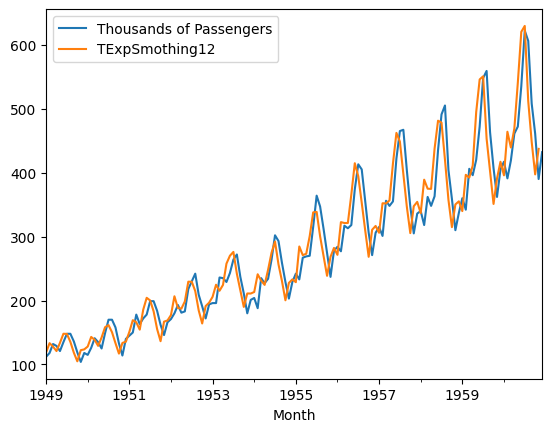

In [8]:
airline.plot()

In [9]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    int64  
 1   TExpSmothing12           143 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.4 KB


In [10]:
trainData = airline.iloc[:108] 
testData = airline.iloc[108:]

In [11]:
trainingModel = ExponentialSmoothing(\
                trainData['Thousands of Passengers'],
                trend='mul',
                seasonal='mul',
                seasonal_periods = 12).fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [12]:
test_pred = trainingModel.forecast(36).rename("HW Forecast")

<Axes: xlabel='Month'>

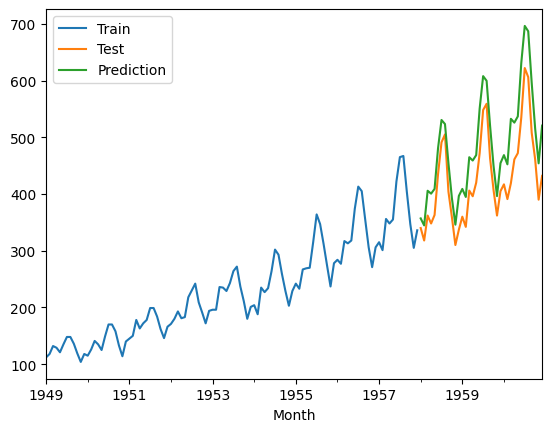

In [13]:
trainData['Thousands of Passengers'].\
    plot(legend=True, label="Train")
testData['Thousands of Passengers'].\
    plot(legend=True, label="Test")
test_pred.plot(legend=True, label="Prediction")

# Evaluation Matrix

In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
mean_absolute_error(\
        testData['Thousands of Passengers'],\
        test_pred)

55.698326986164496

In [16]:
from sklearn.metrics import mean_squared_error
meansq=mean_squared_error(\
        testData['Thousands of Passengers'],\
        test_pred)

In [17]:
meansq

3525.9322806129094

In [18]:
np.sqrt(meansq)

59.3795611352333